In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df0 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Data_Activity_Projection.csv')

df0.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Total_Skills,Sum_Skills_Off,Sum_Skills_Off_ab_avg
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,11,1
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,6,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,3,10,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,15,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10,1


In [3]:
df1 = df0.drop(columns=["Sum_Skills_Off_ab_avg"], inplace=False)
df1.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Total_Skills,Sum_Skills_Off
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,11
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,6
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,3,10
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,15
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10


In [4]:
print(df1.sum(axis=0))


Agriculture        111
Animal Care        108
Art                106
Beauty             117
Dance              101
Music              111
Writing            114
Language           106
Health             121
Sports             122
Food               134
Technology         120
Photo              109
Video              121
Total_Skills      1601
Sum_Skills_Off    7753
dtype: int64


In [5]:
df1.shape

(800, 16)

# 1. KNN model

## 1.1 Model training

In [7]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()

model.fit(X_train, y_train)




LinearRegression()

## 1.2 Model evaluation

In [12]:
# Training Set accuracy
train_predictions = model.predict(X_train)

train_mse = mean_squared_error(y_train, train_predictions)

print("Training Mean Squared Error:", train_mse)

Training Mean Squared Error: 15.518160782062472


In [13]:
# Test Set accuracy
test_predictions = model.predict(X_test)

test_mse = mean_squared_error(y_test, test_predictions)

print("Test Mean Squared Error:", test_mse)

Test Mean Squared Error: 15.650853698147506


### Classification report

In [17]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           6       0.13      0.22      0.17         9
           7       0.00      0.00      0.00         9
           8       0.08      0.06      0.06        18
           9       0.06      0.07      0.06        14
          10       0.09      0.26      0.13        19
          11       0.10      0.09      0.09        23
          12       0.07      0.08      0.07        13
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         1
          17       0.00    

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Confusion matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 5, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 5, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 4, 2, 2, 8, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,

Text(95.72222222222221, 0.5, 'Truth')

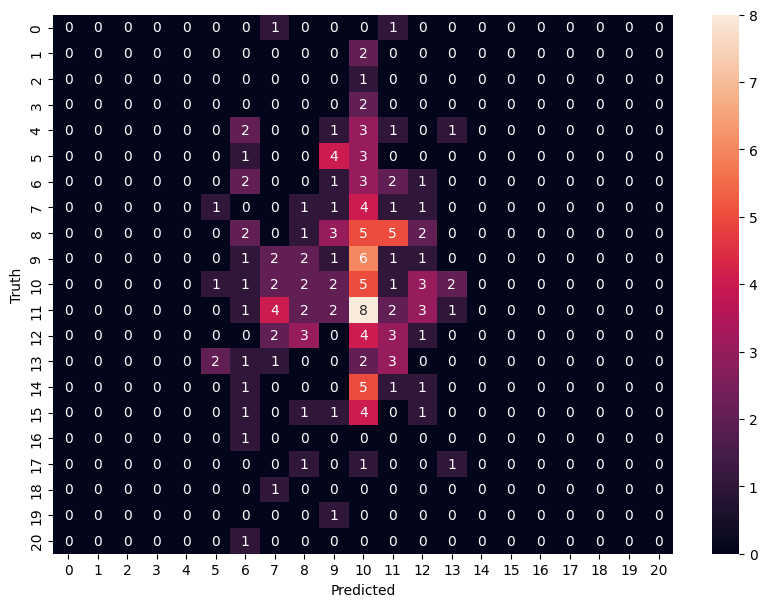

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Cross validation

In [22]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=640)

cv_scores = cross_val_score(knn, X, y, cv=kfold)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

Cross-Validation Scores: [0.1    0.125  0.1125 0.1    0.0875 0.175  0.075  0.0625 0.1125 0.1375]
Mean Accuracy: 0.10874999999999999
Standard Deviation of Accuracy: 0.030644126680328152


In [23]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=200)

cv_scores = cross_val_score(knn, X, y, cv=kfold)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

Cross-Validation Scores: [0.0875 0.0875 0.1125 0.1    0.0625 0.1    0.0875 0.0875 0.125  0.0375]
Mean Accuracy: 0.08875000000000001
Standard Deviation of Accuracy: 0.02335192711533676


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 1.3 Performance improvement

### Hyperparameter tuning

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


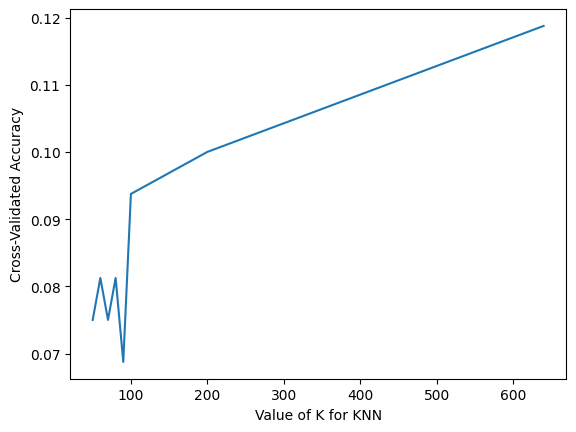

In [24]:
k_range = [50, 60, 70, 80, 90, 100, 200, 640]
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

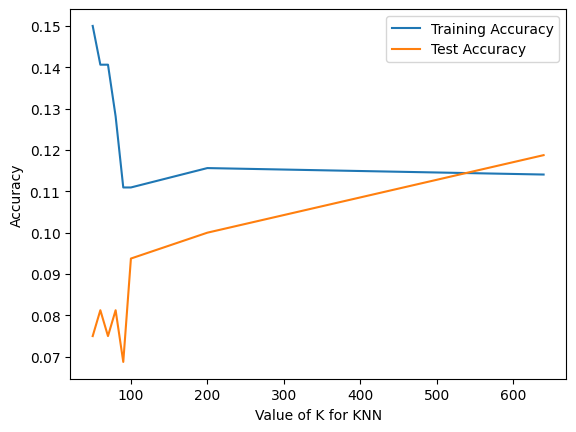

In [25]:
k_range = [50, 60, 70, 80, 90, 100, 200, 640]
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions on training set
    y_train_pred = knn.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    # Predictions on test set
    y_test_pred = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

plt.plot(k_range, train_scores, label='Training Accuracy')
plt.plot(k_range, test_scores, label='Test Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
max_score = max(scores)

max_index = scores.index(max_score)
peak_k_value = k_range[max_index]

peak_indices = [i for i, score in enumerate(scores) if score == max_score]
peak_k_values = [k_range[index] for index in peak_indices]

print("best performing K-values:", peak_k_values)

best performing K-values: [640]


In [29]:
knn = KNeighborsClassifier(n_neighbors=640)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.11875

In [30]:

from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X contains features and y contains labels

# Define the number of features to select
k = 5  # Example value, you can adjust this number

# Initialize the SelectKBest object with the desired statistical test (e.g., f_classif for classification)
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to the data and transform the features
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the indices of the selected features
print("Indices of selected features:", selected_feature_indices)


Indices of selected features: [ 0  3  8 10 11]


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 2. Prepare Model for API 

In [36]:
import pickle

In [37]:
with open('Activity_Projection_Model.pkl', 'wb') as file:
    pickle.dump(knn, file)